# Regressions

In [1]:
import sys
gp = '/home/jupyter-gabriel/'
sys.path.append(gp + "projects/suyana")
from scripts.utils.functions import *

# Load data

In [25]:
# data_folder = Path("../Data/data_output_rendimiento")
# filename = "df_rendimiento_flagged_ONI.csv"
data_folder = gp + "projects/suyana/data/drought/"
filename = "yields_panel_final.csv"
df = pd.read_csv(data_folder + filename)

# Explore Data in file

In [26]:
df.head(3)

,producer_id,zone,lot,plot,orig_crop,variety,seedtime,harvest_date,show_furrow,n_plants_m,n_plants_ha,date_beginning_flowering,mature_maturation_date,plant_height,fertitilized,type_of_fertilizer,dose_kg_ha,rend_ton_ha,cond_climaticas_de_la_campana,producer_handling,id_lot,cultivation_id,culture,yr,summer,...,vhi_flowering_date,ndvi_anomaly_flowering_date_minus_1_month,ndpi_anomaly_flowering_date_minus_1_month,pp_anomaly_flowering_date_minus_1_month,vhi_anomaly_flowering_date_minus_1_month,ndvi_anomaly_flowering_date_minus_2_month,ndpi_anomaly_flowering_date_minus_2_month,pp_anomaly_flowering_date_minus_2_month,vhi_anomaly_flowering_date_minus_2_month,Month,Year,ENSO,pixel_id,anomaly_sum,swc_sum,climatology_sum,id_canton,canton_original,provincia,municipio,departamen,cropYear,cropCycle,flagSummer,accumulatedAnomaly
0,16,Norte,H-2,Las Londras,Sorgo,Timbo,NaN,2016-09-13,0.45,11.0,244444.440,45,110,1.1,MAP,11-52-0,100,1.000000,NaN,NaN,67,2,SORGO,2016,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,ninia,0.0,0.000000,0.0,0.000000,189,El Puente,Guarayos,El Puente,Santa Cruz,2016,2016,0,5.631754
1,14,Este,B04,Europa,Maiz,Maiz 355,2013-03-10,2013-08-20,0.42,2.4,57142.857,5/14/2013,7/13/2013,2.1,0,0,0,1.994742,NaN,NaN,45,1,MAIZ,2013,0,...,27.384402,-22986.655761,-4.350322,-99.537446,-883.337060,-36100.439166,1.791396,-109.046194,-1606.263388,8.0,2013.0,NaN,0.0,10141.265152,25988.0,15846.734848,56,Saturnino,Ńuflo de Chavez,San Julian,Santa Cruz,2012,2012,1,2.179553
2,14,Este,A09,Europa,Sorgo,DAS-5000,2013-03-19,2013-07-24,0.42,9.0,214285.710,5/3/2013,7/7/2013,1.1,0,0,0,2.323631,NaN,NaN,43,2,SORGO,2013,0,...,24.390516,22223.058567,11.863377,107.183678,-914.857636,-14995.596168,0.469207,-157.261620,-1528.424227,7.0,2013.0,NaN,0.0,8117.090909,20801.0,12683.909091,56,Saturnino,Ńuflo de Chavez,San Julian,Santa Cruz,2012,2012,1,2.192454


In [27]:
df_missings = pd.DataFrame({'column':list(df.columns), 'missings': list(df.count())})
display(df_missings)

,column,missings
0,producer_id,719
1,zone,719
2,lot,719
3,plot,719
4,orig_crop,719
...,...,...
91,departamen,719
92,cropYear,719
93,cropCycle,719
94,flagSummer,719


# Ubicación geográfica

Utilizar folium para tener una idea de la ubicación geográfica de los puntos de referencia.

In [5]:
#Locate centroid based on latitude and longitude
center = [ df["latitude"].mean(), df["longitude"].mean()]

In [6]:
#Create a Folium Map centered at the center coordinates to add layers of points
map = folium.Map(location = center, zoom_start = 8)

#Create a palette to color the markers based on category
unique_categories = df['zone'].unique()
palette = sns.color_palette("hsv", len(unique_categories)).as_hex()
color_map = dict(zip(unique_categories, palette))

for _, row in df.iterrows():
  folium.CircleMarker(
      location = [row["latitude"], row["longitude"]],
      radius = 6,
      color = color_map[row['zone']],
      opacity = 0.1,
      #fill = True,
      fill_color = color_map[row['zone']],
      fill_opacity = 0.1,
      popup = row['zone'],
      icon = folium.Icon(color='green')
  ).add_to(map)

#Display Map
map

In [7]:
df.groupby('yr').agg(n = ('yr','count'))

,n
yr,
2013,77
2014,169
2015,166
2016,166
2017,131
2018,51


# Conclusiones iniciales

* Data since 2013 up to 2018 of crop yields.
* This data comes from crops in the north region of Santa Cruz, Bolivia.

# Plot data

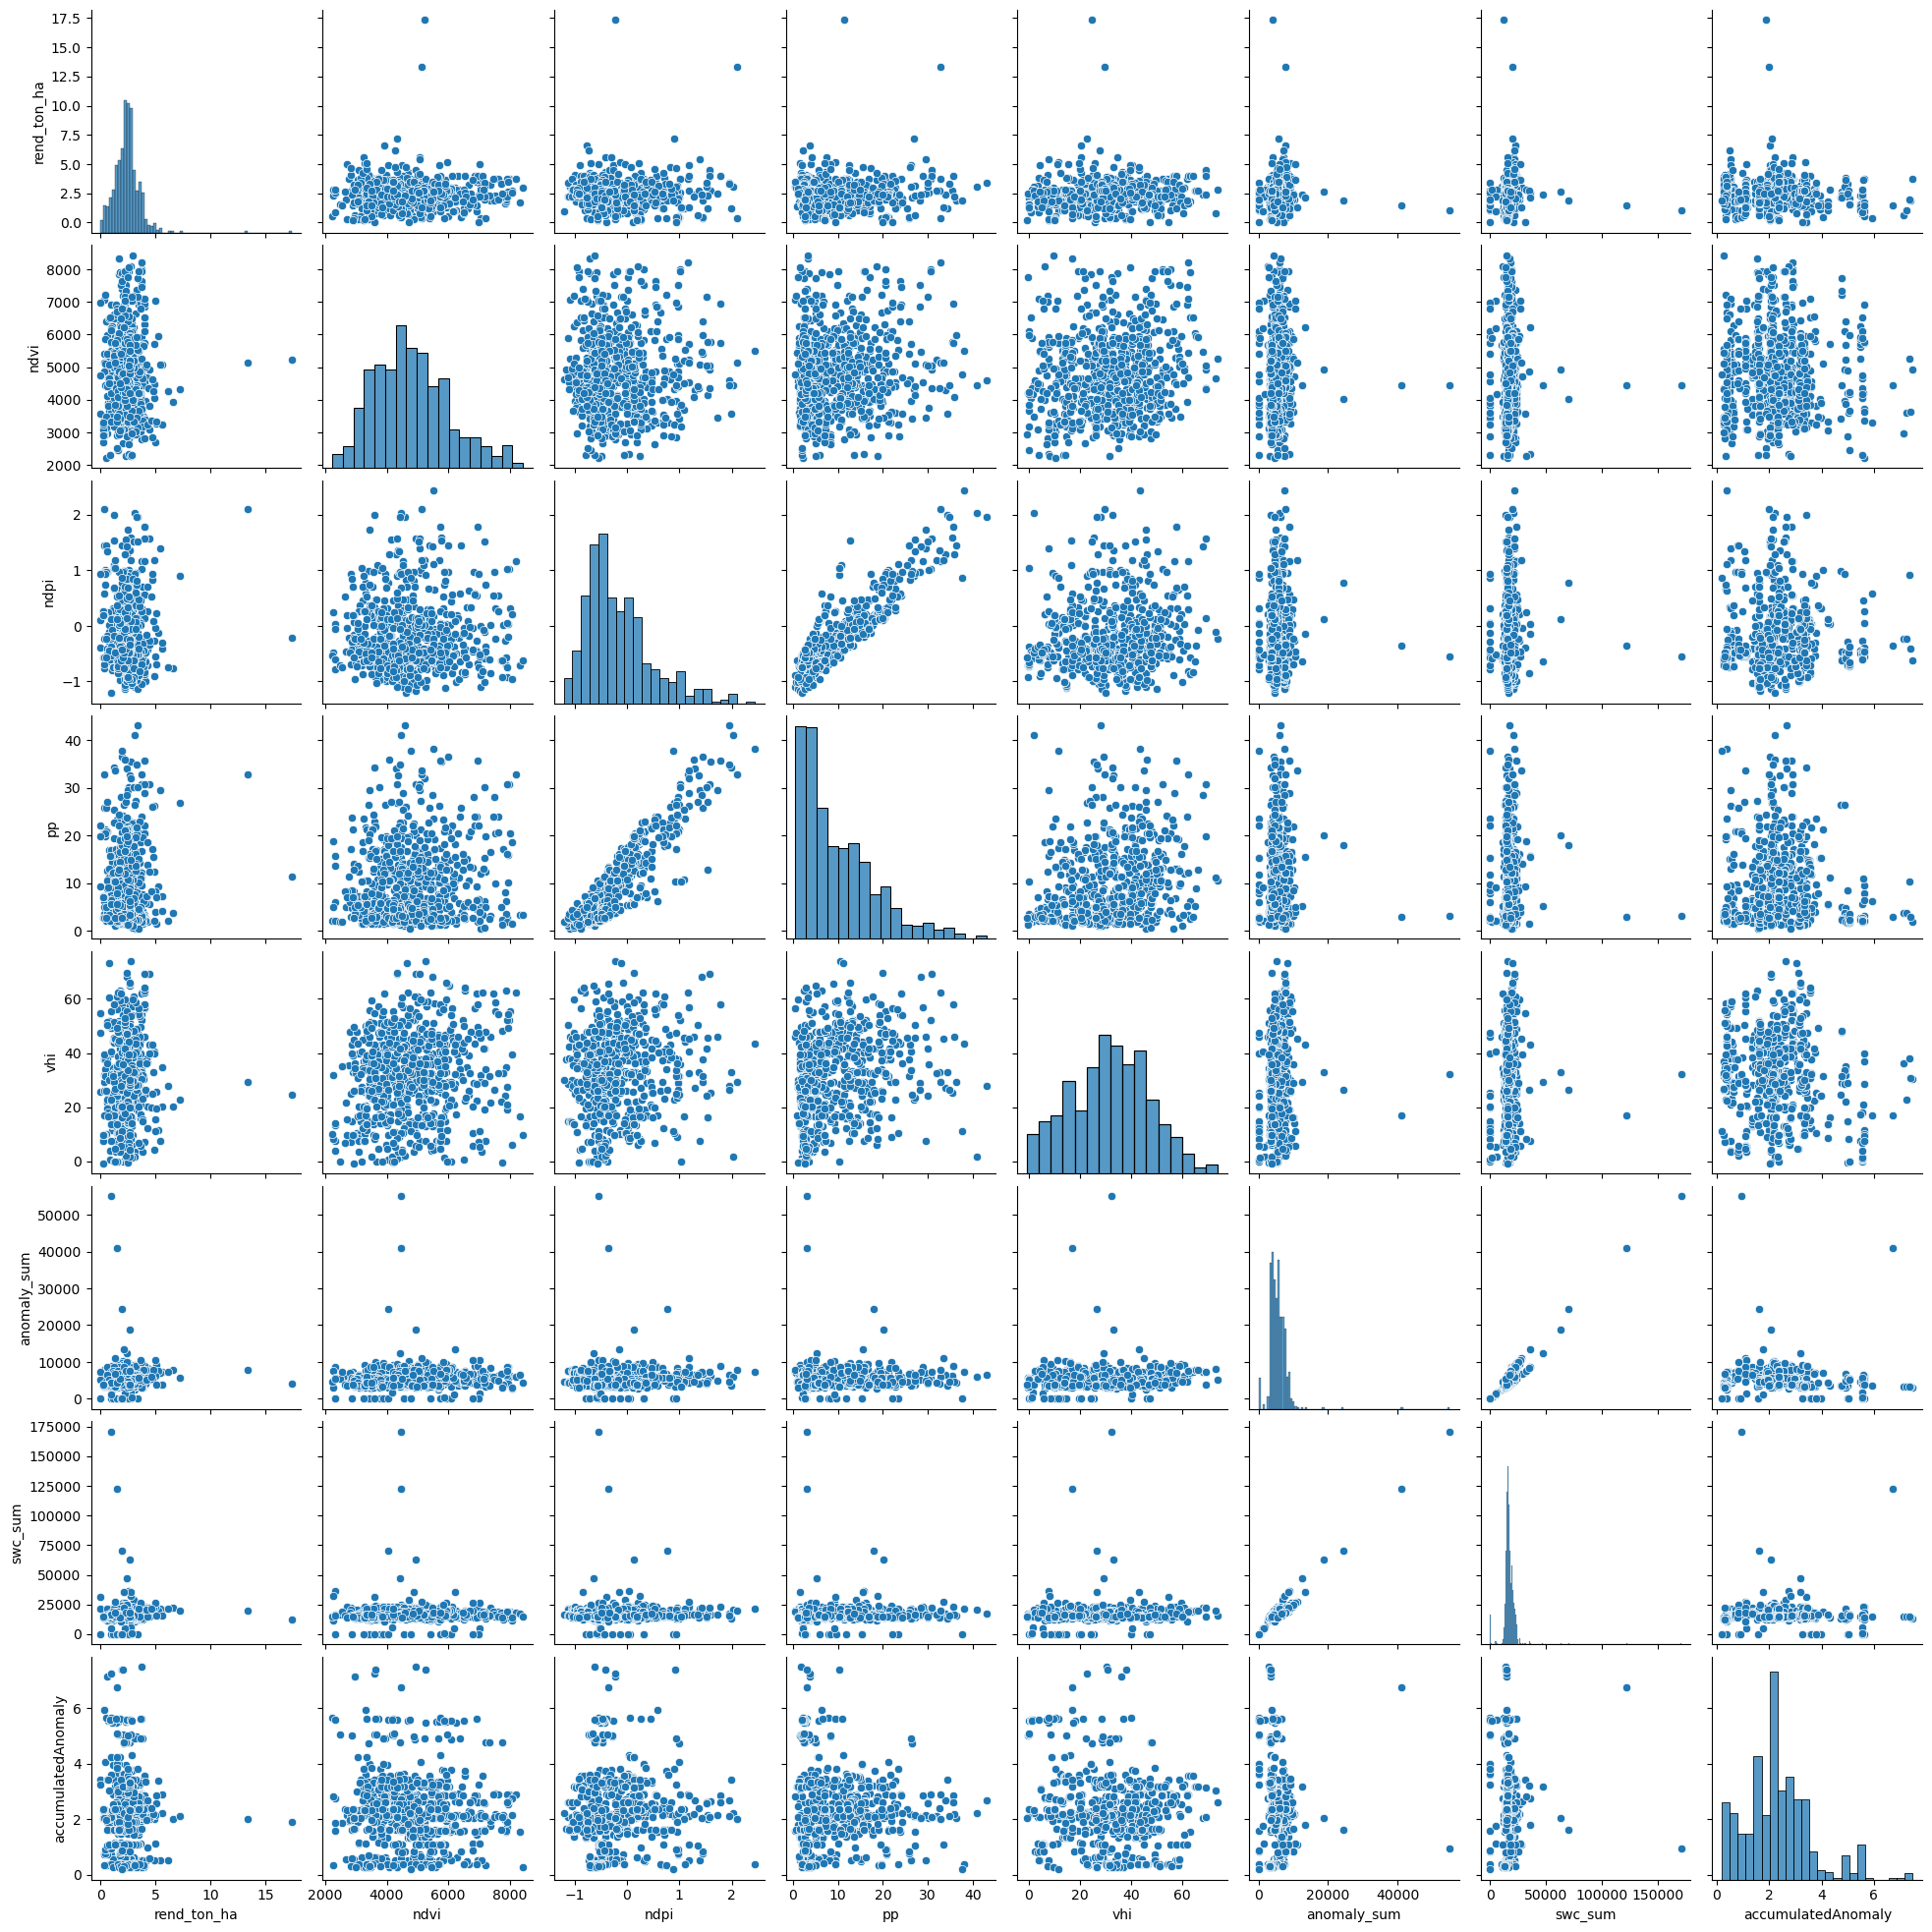

In [28]:
sns.pairplot(df, vars=["rend_ton_ha", "ndvi", "ndpi", "pp", "vhi", "anomaly_sum", "swc_sum", "accumulatedAnomaly"])

# Plot seedtime

In [29]:
# Assuming df is your DataFrame with the "seedtime" column

# Convert "seedtime" column to datetime format
df["seedtime"] = pd.to_datetime(df["seedtime"], errors="coerce")
#df["seedtime"]

# Extract month and year
df["month"] = df["seedtime"].dt.month
df["year"] = df["seedtime"].dt.year

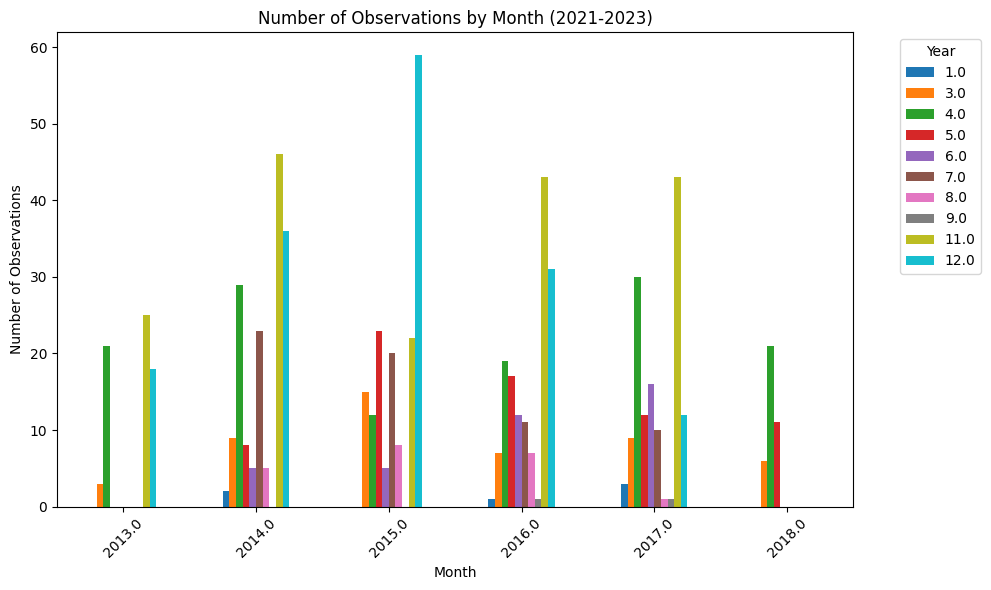

In [231]:
# Group by month and year and count observations
monthly_counts = df.groupby(["year", "month"]).size().unstack(fill_value=0)

# Plot the bar chart
monthly_counts.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Number of Observations by Month (2021-2023)")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Create and/or impute variables

In [30]:
def group_categories_MT(df_orig, group_categories):
    """
    Groups the categories of a categorical variable in a DataFrame.

    Parameters:
        df_orig (pd.DataFrame): DataFrame containing the client variables.
        group_categories (dict): Dictionary that contains the categories to be grouped.
                                 The keys are the column names, and the values are dictionaries
                                 where the keys are the new categories and the values are lists
                                 of the original categories to be grouped under the new category.

    Returns:
        pd.DataFrame: Modified DataFrame with grouped category columns.
    """
    df = df_orig.copy()
    
    features_group = group_categories["categories"]

    for column in features_group:
        for new_category, original_categories in features_group[column].items():
            df[column] = df[column].replace(original_categories, new_category)

    return df

In [31]:
def modify_categories(
    df_orig: pd.DataFrame(), params_modificacion_categorias
) -> pd.DataFrame():
    """Modify categories in the dataset based on specified values.

    Args:
        df_orig (pd.DataFrame): The complete dataset with all variables.
        params_modificacion_categorias (dict): A dictionary containing the column and the desired categories for that column.
            Other categories not specified will be replaced with 'OTRO'.

    Returns:
        pd.DataFrame: The modified dataset with updated categories.

    Example:
        >>> df = modify_categories(df, params_modificacion_categorias)
    """

    df = df_orig.copy()

    # Parameters
    variables_valores = params_modificacion_categorias["variables_valores"]

    for col in variables_valores:
        print(col)
        df[col] = df[col].apply(
            lambda x: x if x in variables_valores[col] else "OTRO"
        )

    return df


In [32]:
def treat_nans(df_orig, params):
    """
    Treats missing values in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the client variables.
        params (dict): Dictionary containing the parameters to treat missing values.

    Returns:
        pd.DataFrame: Modified DataFrame with treated missing values.
    """
    df = df_orig.copy()
    # Parameters
    missing_vars = params["missing_vars"]
    method = params["method"]
    group_vars = params["group_vars"]

    if set(group_vars).intersection(set(missing_vars)) != set():
        print("Error: group_vars and missing_vars should not have common variables.")
        return
    # Treat missing values
    if method == "remove":
        df = df.dropna(subset=missing_vars)
    elif method == "impute":
        for var in missing_vars:
            if df[var].dtype == "object":
                df[var] = df[var].fillna("MISSING")
            elif len(group_vars) == 0:
                df[var] = df[var].fillna(df[var].mean())
            else:
                df[var] = df.groupby(group_vars)[var].transform(
                    lambda x: x.fillna(x.mean())
                )

    return df

In [33]:
def apply_log_to_var(df_orig, var, fill_value="mean"):
    """
    Apply the natural logarithm to the specified variables in the DataFrame.

    Parameters:
        df_orig (pd.DataFrame): DataFrame containing the client variables.
        params (dict): Dictionary containing the parameters to apply the natural logarithm.

    Returns:
        pd.DataFrame: Modified DataFrame with the natural logarithm applied to the specified variables.
    """
    df = df_orig.copy()
       
    # Apply the natural logarithm
    min_value = df.loc[df[var] > 0, var].min()
    df[var] = np.where(df[var] <= 0, min_value*0.9, df[var])

    df["log_"+var] = np.log(df[var])
    df["log_"+var] = np.where(
        df["log_"+var].isin([np.inf, -np.inf]), 
        np.nan, 
        df["log_"+var]
    )
    if fill_value == "mean":
        df["log_"+var] = df["log_"+var].fillna(df["log_"+var].mean())
    else:
        df["log_"+var] = df["log_"+var].fillna(fill_value)

    return df

In [34]:
params_group_categ = {
    'categories': {
        'culture': {
            #'GIRASOL': ['Girasol'],
            'MAIZ': ['MAIZ', 'MAIZ ENSILAJE'],
            'TRIGO': ['TRIGO'],
            'SOYA': ['SOYA'],
            'SORGO': ['SORGO', 'SORGO DOBLE PROPOSITO', 'SORGO DOBLE PROPOSITO ENSILAJE', 'SORGO FORRAJERO'],
        }
    }
}
params_modif_categ = {
    'variables_valores': {
        'culture': ['MAIZ', 'TRIGO', 'SOYA', 'SORGO']
    }
}
params_nans = {
    'missing_vars': ['rend_ton_ha', 'ndvi', 'ndpi', 'pp', 'vhi', 'anomaly_sum', 'swc_sum'],
    'method': 'impute',
    'group_vars': []
}

In [35]:
df_aux = group_categories_MT(df, params_group_categ)
df_aux = modify_categories(df_aux, params_modif_categ)
df_aux = treat_nans(df_aux, params_nans)

culture


In [36]:
df_aux['culture'].value_counts()

culture
SOYA     427
SORGO    115
TRIGO    100
MAIZ      59
OTRO      18
Name: count, dtype: int64

In [37]:
def create_mt(df_orig, target, params):
    """
    Trains a regression model on the given data.

    Parameters:
        df (pd.DataFrame): DataFrame containing the client variables.
        target (str): Name of the target variable.
        params (dict): Hyperparameters for the model.

    Returns:
        object: Trained regression model.
    """

    df = df_orig.copy()
    # Parameters
    list_log_vars = params['list_log_vars']

    # Get the log of the target variable and add it to the DataFrame
    df = apply_log_to_var(df, target)

    for var in list_log_vars:
        df = apply_log_to_var(df, var, fill_value=1e10)
    
    return df

In [38]:
params_log_vars = {
    'list_log_vars': ['ndvi', 'ndpi', 'pp', 'vhi', 'anomaly_sum', 'swc_sum', 'accumulatedAnomaly']
}
df_mt = create_mt(df_aux, 'rend_ton_ha', params_log_vars)

In [39]:
def train_model(df_orig, params):
    """
    Trains a regression model on the given data.

    Parameters:
        df (pd.DataFrame): DataFrame containing the client variables.
        target (str): Name of the target variable.
        features (list): List of feature variables to use in the model.
        model (object): Regression model object to use for training.

    Returns:
        object: Trained regression model.
    """
    formula_str = params["formula_str"]
    filter_str = params["filter_str"]

    df = df_orig.copy()

    # Filter the data
    df = df.query(filter_str)

    # Train the model
    model = sfm.ols(formula=formula_str, data=df)
    results = model.fit()

    return model, results

### Pairplots

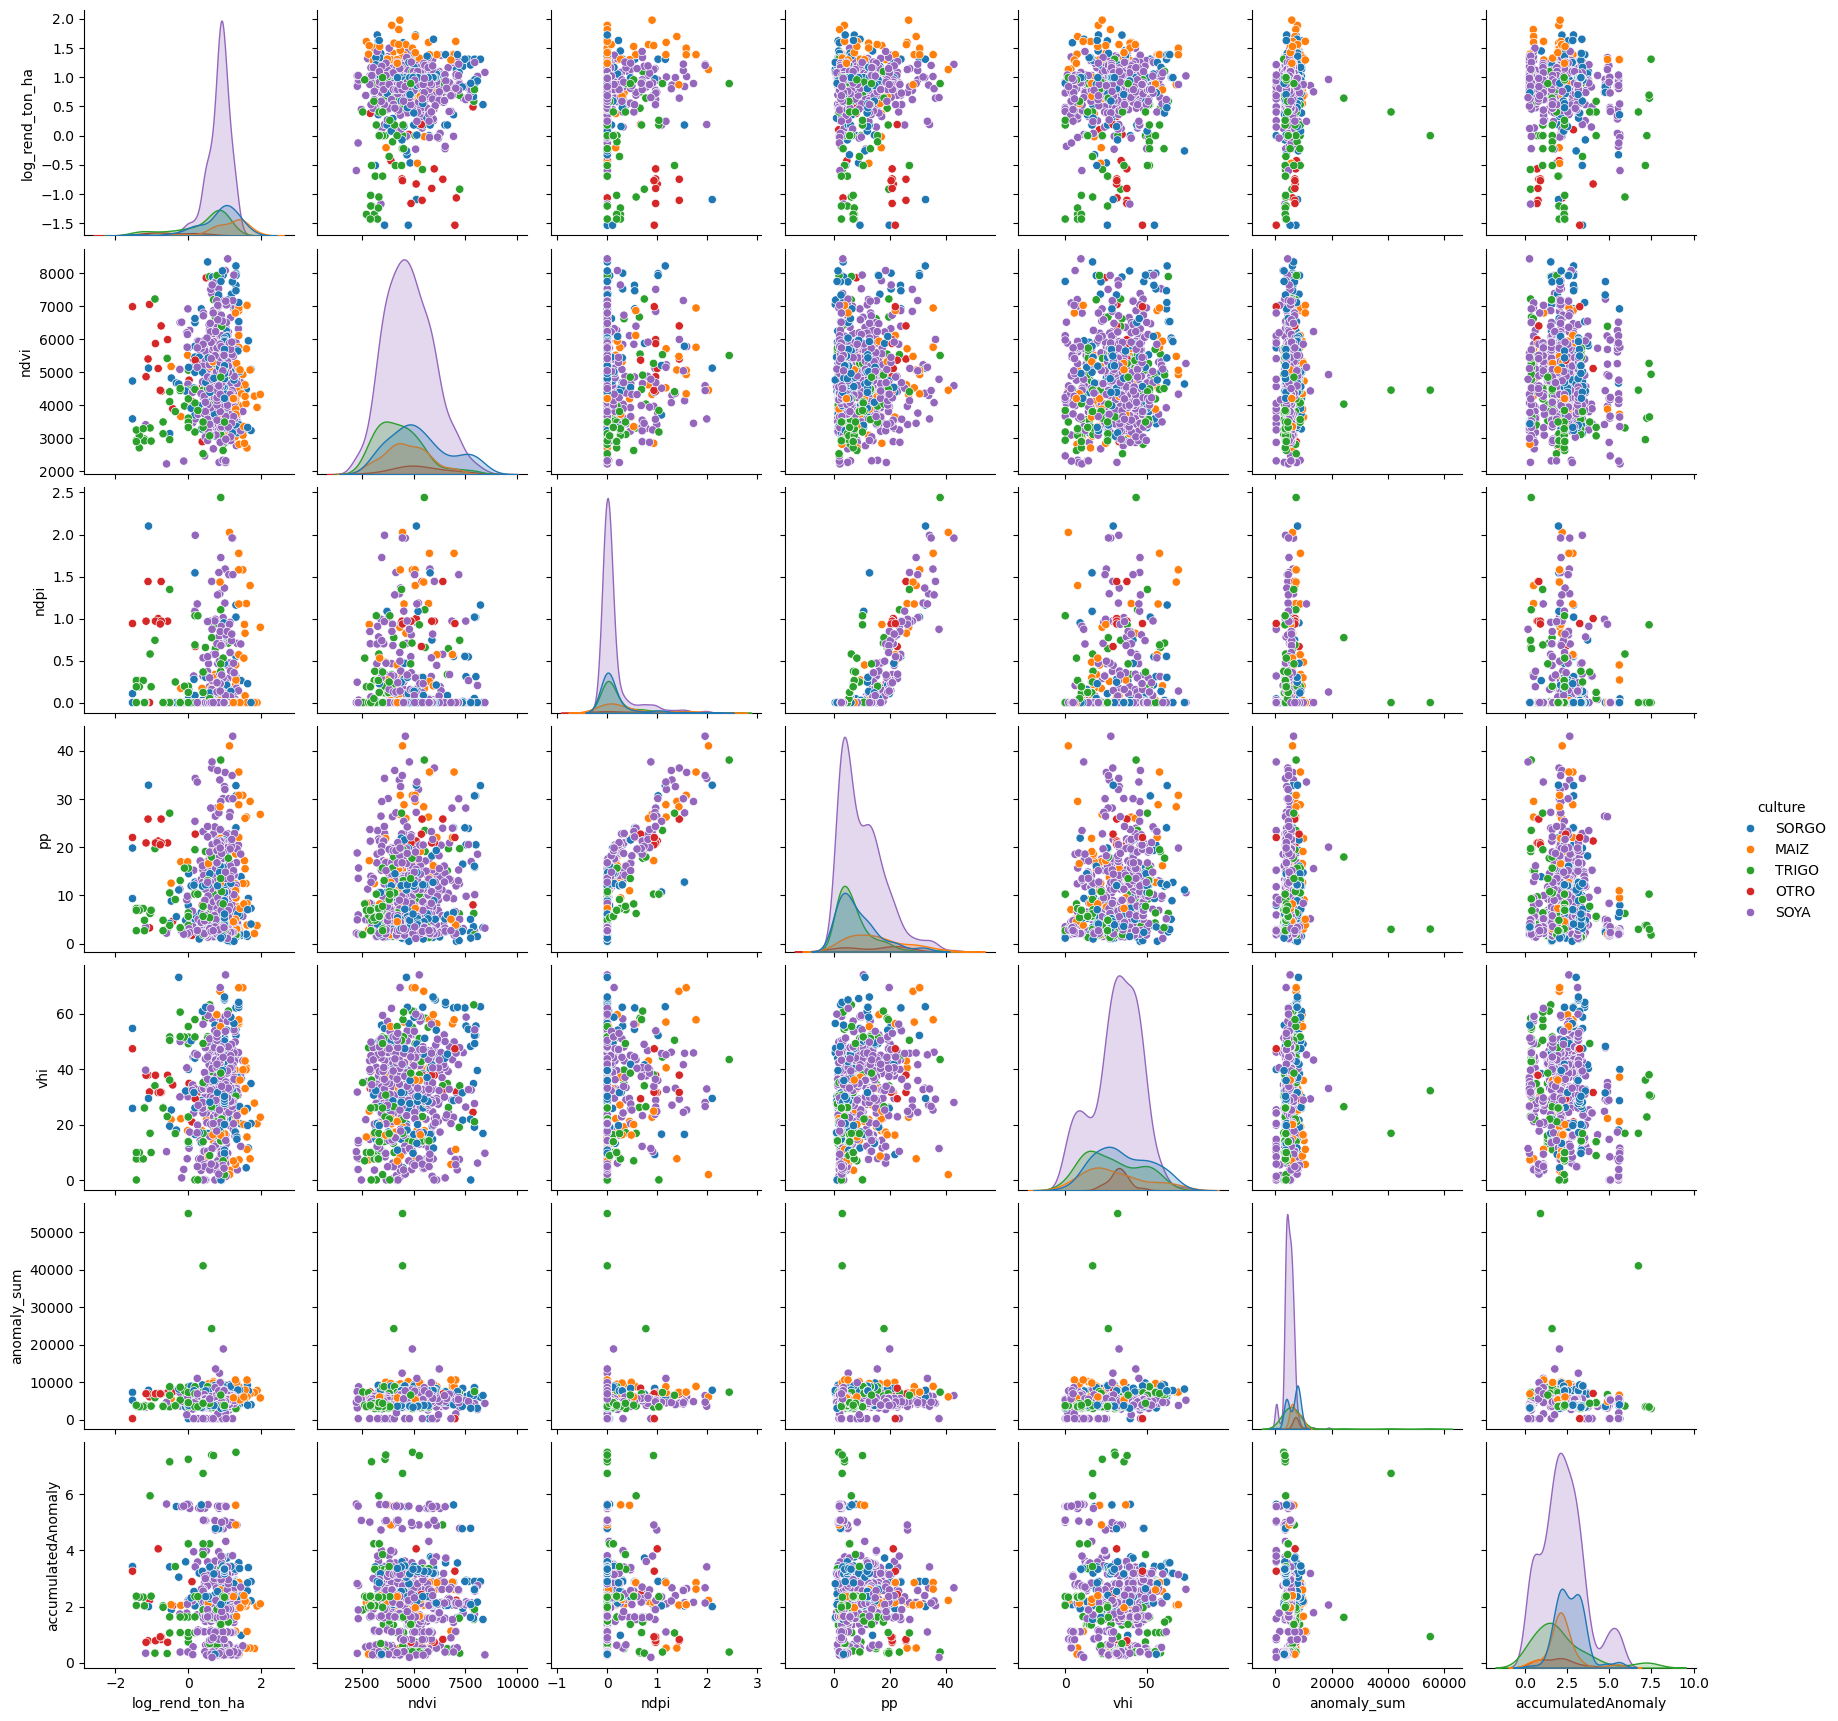

In [61]:
sns.pairplot(data=df_mt.query(params_model['filter_str'])[["log_rend_ton_ha", "ndvi", "ndpi", "pp", "vhi", "anomaly_sum", "accumulatedAnomaly", "culture"]], hue='culture')

### Regress log_rend_ton_ha on log_anomaly_sum interacting with culture

In [40]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ log_anomaly_sum/culture',
    'filter_str': 'rend_ton_ha < 10 & anomaly_sum < 10000'
}
mod, results_full = train_model(df_mt, params_model)

results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     44.06
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.49e-39
Time:                        19:43:53   Log-Likelihood:                -473.35
No. Observations:                 707   AIC:                             958.7
Df Residuals:                     701   BIC:                             986.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0063      0.271      0.023      0.981      -0.525       0.538
log_anomaly_sum                      0.1275      0.031      4.050      0.000       0.066       0.189
log_anomaly_sum:culture[T.OTRO]     -0.1757      0.015    -11.923      0.000      -0.205      -0.147
log_anomaly_sum:culture[T.SORGO]    -0.0324      0.009     -3.651      0.000      -0.050      -0.015
log_anomaly_sum:culture[T.SOYA]     -0.0287      0.008     -3.624      0.000      -0.044      -0.013
log_anomaly_sum:culture[T.TRIGO]    -0.0815      0.009     -8.831      0.000      -0.100      -0.063
==============================================================================
Omnibus:                      222.078   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.717
Skew:                          -1.520   Prob(JB):                    1.70e-150
Kurtosis:                       6.764   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress log_rend_ton_ha on log_anomaly_sum only

In [41]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ log_anomaly_sum',
    'filter_str': 'rend_ton_ha < 10 & anomaly_sum < 10000'
}
mod, results_red = train_model(df_mt, params_model)

results_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.314
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0382
Time:                        19:44:04   Log-Likelihood:                -567.79
No. Observations:                 707   AIC:                             1140.
Df Residuals:                     705   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1474      0.298      0.495      0.621      -0.437       0.732
log_anomaly_sum     0.0728      0.035      2.077      0.038       0.004       0.142
==============================================================================
Omnibus:                      261.136   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.749
Skew:                          -1.776   Prob(JB):                    3.39e-192
Kurtosis:                       7.161   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress log rend ton ha on log of accumulated anomaly controlling crop

In [48]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ accumulatedAnomaly/culture',
    'filter_str': 'rend_ton_ha < 10'
}
mod, results_full = train_model(df_mt, params_model)

results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     30.92
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.65e-28
Time:                        19:46:35   Log-Likelihood:                -505.97
No. Observations:                 717   AIC:                             1024.
Df Residuals:                     711   BIC:                             1051.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.7788      0.038     20.354      0.000       0.704       0.854
accumulatedAnomaly                      0.1324      0.031      4.332      0.000       0.072       0.192
accumulatedAnomaly:culture[T.OTRO]     -0.6287      0.062    -10.090      0.000      -0.751      -0.506
accumulatedAnomaly:culture[T.SORGO]    -0.1222      0.031     -3.887      0.000      -0.184      -0.060
accumulatedAnomaly:culture[T.SOYA]     -0.1191      0.028     -4.196      0.000      -0.175      -0.063
accumulatedAnomaly:culture[T.TRIGO]    -0.2592      0.032     -7.986      0.000      -0.323      -0.196
==============================================================================
Omnibus:                      230.437   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.317
Skew:                          -1.554   Prob(JB):                    5.21e-158
Kurtosis:                       6.819   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress log rend ton ha on accumulatedAnomaly only

In [62]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ accumulatedAnomaly',
    'filter_str': 'rend_ton_ha < 10'
}
mod, results_red = train_model(df_mt, params_model)

results_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8445
Date:                Mon, 20 Jan 2025   Prob (F-statistic):              0.358
Time:                        20:32:40   Log-Likelihood:                -576.08
No. Observations:                 717   AIC:                             1156.
Df Residuals:                     715   BIC:                             1165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7976      0.042     19.148      0.000       0.716       0.879
accumulatedAnomaly    -0.0145      0.016     -0.919      0.358      -0.045       0.016
==============================================================================
Omnibus:                      263.487   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.286
Skew:                          -1.759   Prob(JB):                    4.33e-197
Kurtosis:                       7.229   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Compare models

In [50]:
import statsmodels.api as sm
from scipy.stats import f
import numpy as np

def compare_models(full_model, reduced_model):
    """
    Compare two nested models (reduced and full) using AIC, BIC, Bayes factor, and F-test.

    Parameters:
        reduced_model: Fitted statsmodels OLS model (reduced model).
        full_model: Fitted statsmodels OLS model (full model).

    Returns:
        dict: A dictionary with AIC, BIC, Bayes factor, F-statistic, and p-value.
    """
    # Extract AIC and BIC
    aic_reduced = reduced_model.aic
    bic_reduced = reduced_model.bic
    aic_full = full_model.aic
    bic_full = full_model.bic

    # Residual Sum of Squares and Degrees of Freedom
    rss_reduced = reduced_model.ssr
    rss_full = full_model.ssr
    df_reduced = reduced_model.df_resid
    df_full = full_model.df_resid

    # F-test
    num = (rss_reduced - rss_full) / (df_reduced - df_full)  # Numerator
    den = rss_full / df_full  # Denominator
    F_stat = num / den
    p_value = f.sf(F_stat, df_reduced - df_full, df_full)

    # Bayes Factor (BIC-based approximation)
    bayes_factor = np.exp((reduced_model.bic - full_model.bic) / 2)

    df_compare = pd.DataFrame()

    # Include the results of full model
    df_compare.loc[0, 'model'] = 'Full'
    df_compare.loc[0, 'aic'] = aic_full
    df_compare.loc[0, 'bic'] = bic_full
    df_compare.loc[0, 'bayesFactor'] = bayes_factor
    df_compare.loc[0, 'rss'] = rss_full
    df_compare.loc[0, 'F-statistic'] = F_stat
    df_compare.loc[0, 'p-value'] = p_value

    # Include the results of reduced model
    df_compare.loc[1, 'model'] = 'Reduced'
    df_compare.loc[1, 'aic'] = aic_reduced
    df_compare.loc[1, 'bic'] = bic_reduced
    df_compare.loc[1, 'rss'] = rss_reduced

    return df_compare

In [51]:
compare_models(results_full, results_red)

,model,aic,bic,bayesFactor,rss,F-statistic,p-value
0,Full,1023.949921,1051.400376,5.430025e+24,172.184310,38.390048,4.131273e-29
1,Reduced,1156.158197,1165.308348,NaN,209.372293,NaN,NaN


In [52]:
list(df_mt['culture'].unique())

['SORGO', 'MAIZ', 'TRIGO', 'OTRO', 'SOYA']

In [318]:
std_log_anomaly = df_mt.query(params_model['filter_str'])['log_anomaly_sum'].std()
df_filtered = df_mt.query(params_model['filter_str'])
for crop in list(df_mt['culture'].unique()):
    try:
        mean_rend = df_filtered.loc[df_filtered['culture']==crop,'rend_ton_ha'].mean()
        var_rend_ton_ha = np.exp(
            results_full.params['Intercept'] + 
            (results_full.params['log_anomaly_sum'] + 
            results_full.params['log_anomaly_sum:culture[T.'+crop+']']) * std_log_anomaly
        )
        print(f'Una desviación de 1 std en log_anomaly implica un cambio de {var_rend_ton_ha:.2f} en rendimiento de {crop} o {var_rend_ton_ha/mean_rend:.2%} del rendimiento medio {mean_rend:.2f}')
    except:
        mean_rend = df_filtered.loc[df_filtered['culture']==crop,'rend_ton_ha'].mean()
        var_rend_ton_ha = np.exp(
            results_full.params['Intercept'] + 
            (results_full.params['log_anomaly_sum']) * std_log_anomaly
        )
        print(f'Una desviación de 1 std en log_anomaly implica un cambio de {var_rend_ton_ha:.2f} en rendimiento de {crop} o {var_rend_ton_ha/mean_rend:.2%} del rendimiento medio {mean_rend:.2f}')

Una desviación de 1 std en log_anomaly implica un cambio de 0.49 en rendimiento de SORGO o 18.67% del rendimiento medio 2.62
Una desviación de 1 std en log_anomaly implica un cambio de 0.50 en rendimiento de MAIZ o 14.67% del rendimiento medio 3.42
Una desviación de 1 std en log_anomaly implica un cambio de 0.47 en rendimiento de TRIGO o 26.50% del rendimiento medio 1.77
Una desviación de 1 std en log_anomaly implica un cambio de 0.41 en rendimiento de OTRO o 71.20% del rendimiento medio 0.58
Una desviación de 1 std en log_anomaly implica un cambio de 0.49 en rendimiento de SOYA o 20.44% del rendimiento medio 2.41


<Axes: xlabel='accumulatedAnomaly', ylabel='rend_ton_ha'>

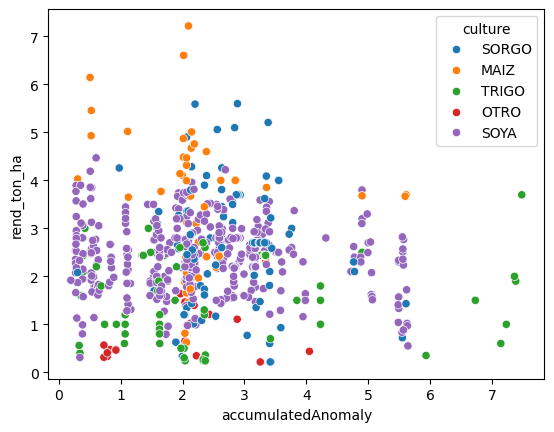

In [55]:
sns.scatterplot(
    data=df_mt.query(params_model['filter_str']), 
    x='accumulatedAnomaly', 
    y='rend_ton_ha', 
    hue='culture'
)

# Regress yields on NDPI

In [ ]:
# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
df_aux = df[~(df["log_rend_ton_ha"].isin([np.inf, -np.inf]))].copy()
X = df_aux["ndpi_anomaly"]
"ndpi_anomaly"
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df_aux["log_rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

In [ ]:
# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
X = df["ndpi_anomaly"]
"ndpi_anomaly"
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df["log_rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Regress yields on anomaly

In [ ]:
df = df_backup.copy()
df = df.dropna(subset=["rend_ton_ha", "anomaly_sum"])
# df["rend_ton_ha"] = df["rend_ton_ha"]
# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
# df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
# X = df["log_anomaly"]
X = df["anomaly_sum"]
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
# y = df["log_rend_ton_ha"]
y = df["rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Filter rows with large SWC anomaly values

In [ ]:
#data_folder = Path("../../Data/regressions")
#filename = "yields_panel.csv"
#df = pd.read_csv(data_folder / filename)

df = df.dropna(subset=["rend_ton_ha", "anomaly_sum"])
df = df[df["anomaly_sum"] < 10000]
# df = df[df["anomaly_sum"] > 0]
df = df[df["rend_ton_ha"] < 10]
# df["rend_ton_ha"] = df["rend_ton_ha"]
# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
# df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
# X = df["log_anomaly"]
# X = df["swc_sum"]
X = df["anomaly_sum"]
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
# y = df["log_rend_ton_ha"]
y = df["rend_ton_ha"]

# Replace Infs with a large finite value
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
# y.replace([np.inf, -np.inf], np.nan, inplace=True)
# y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
red_model = sm.OLS(y, X)
red_results = red_model.fit()

# Print the regression results
print(red_results.summary())

In [33]:
anomaly_std = df["anomaly_sum"].std()
print(f"The standard deviation of the anomaly is: {anomaly_std:.2f}")
beta = results.params["anomaly_sum"]
print(f"The anomaly coefficient is: {beta:.6f}")

The standard deviation of the anomaly is: 1894.17
The anomaly coefficient is: 0.000061


In [ ]:
yield_mean = df["rend_ton_ha"].mean()

In [ ]:
print(
    f"A 1 standard deviation drought would reduce the yield by: {beta * anomaly_std:.2f} or {beta * anomaly_std / yield_mean*100:.2f}%"
)
print(
    f"A 2 standard deviation drought would reduce the yield by: {2*beta * anomaly_std:.2f} or {2*beta * anomaly_std / yield_mean*100:.2f}%"
)

A 1 standard deviation drought would reduce the yield by: 0.34 or 14.96%
A 2 standard deviation drought would reduce the yield by: 0.69 or 29.92%
